# Import the data

The book loads the Iris dataset directly from the _UCI Machine Learning Repository_ into a _DataFrame_ object and prints the last 5 lines via the _tail_ method to check if the data was loaded correctly.  In this code, I will load the data locally (offline) from my computer.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/henri/stuff/machine_learning/sebastian_raschka/henris_coding/chapter_02/iris.data', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Visualising the data

Next, we extract the first 100 class labels that correspond to the 50 ```Iris-setosa``` and 50 ```Iris-versicolor``` flowers, and convert the class labels into the two integer class labels:

- +1: ```versicolor```
- -1: ```setosa```

that we then assign to a vector ```y```, where the values method of a pandas ```DataFrame``` yields the corresponding NumPy representation.

Similarly, we extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix ```X```, which we can visualise via a 2-dimensional scatter plot:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Select the setosa and versicolor samples.
y = df.iloc[0:100, 4].values
# print(y)

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)
# print(y)

In [6]:
# Extract the sepal length and the petal length
X = df.iloc[0:100, [0, 2]].values
# print(X)

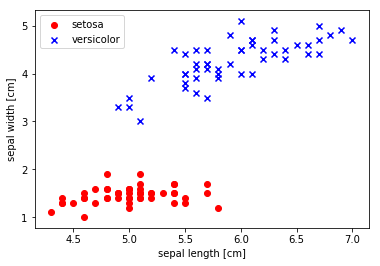

In [7]:
# plot the data
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o',
           label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.show()

The scatter plot indicates that a linear classifier, such as the perceptron, should be able to classify the flowers in this dataset perfectly.

# Training our perceptron algorithm

It is time to train our perceptron algorithm on the Iris dataset that we just extracted.  Furthermore, we will plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that separates the 2 Iris flower classes.

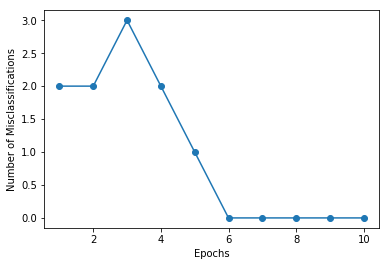

In [8]:
from Perceptron import Perceptron

ppn = Perceptron(eta=0.01, n_iter=10, random_state=1)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')

plt.show()

## Interpretation of the above graph

As we can see in the preceding plot, our perceptron converged after the 6th epoch, and should now be able to classify the training samples perfectly.  Let us implement a small convenience function to visualize the decision boundaries for the two-dimensional datasets:

## Defining a convenience function to visualise the decision boundaries for 2D datasets:

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # Setup the marker generator and the color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

First we define a number of ```colors``` and ```markers``` and create a color map from the list of colors via ```ListedColormap```.  Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays ```xx1``` and ```xx2``` via the NumPy ```meshgrid``` function.  Since we trained our perceptron classifier on 2 feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the ```predict``` method to predict the class labels ```Z``` of the corresponding grid points.

After reshaping the predicted class labels ```Z``` into a grid with the same dimensions as ```xx1``` and ```xx2```, we can now draw a contour plot via Matplotlib's ```contourf``` function, which maps the different decision regions to different colors for each predicted class in the grid array:

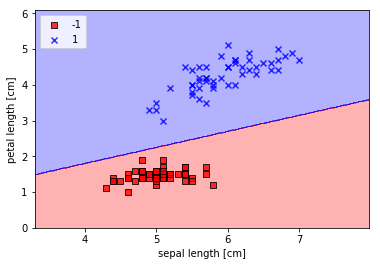

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As we can see in the plot, the perceptron learing learned a decision boundary that is able to classify all the flower samples in the Iris training subset perfectly.

# A Note of Caution:

Although the perceptron classified the 2 Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron.  Frank Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane.  However, if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.